In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

c:\users\devan\appdata\local\programs\python\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
%matplotlib inline

In [3]:
x_data = np.linspace(0.0,10.0,1000000)

In [4]:
x_data

array([0.000000e+00, 1.000001e-05, 2.000002e-05, ..., 9.999980e+00,
       9.999990e+00, 1.000000e+01])

In [5]:
noise = np.random.randn(len(x_data))

In [6]:
noise

array([ 0.65269913,  1.37829332, -0.6189736 , ..., -0.96233278,
       -1.27411914, -0.24762667])

y = mx  + b 

b = 5



In [7]:
y_true = (0.5 * x_data) + 5 + noise

In [8]:
y_true

array([5.65269913, 6.37829832, 4.3810364 , ..., 9.03765722, 8.72587586,
       9.75237333])

In [9]:
x_df = pd.DataFrame(data=x_data,columns=['X Data'])

In [10]:
y_df = pd.DataFrame(data=y_true,columns=['Y'])

In [11]:
x_df.head()

,X Data
0,0.00000
1,0.00001
2,0.00002
3,0.00003
4,0.00004


In [12]:
y_df.head()

,Y
0,5.652699
1,6.378298
2,4.381036
3,5.377160
4,6.542205


In [13]:
#axis 1 secara horizontal kalo engga dia 0 jadi tumpukan
my_data = pd.concat([x_df,y_df], axis=1)

In [14]:
my_data.head()

,X Data,Y
0,0.00000,5.652699
1,0.00001,6.378298
2,0.00002,4.381036
3,0.00003,5.377160
4,0.00004,6.542205


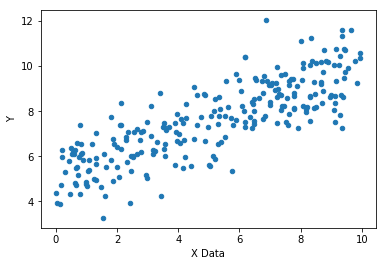

In [15]:
my_data.sample(n=250).plot(kind="scatter", x='X Data', y='Y')

In [16]:
batch_size = 8

In [17]:
np.random.rand(2)

array([0.90023494, 0.99035253])

In [18]:
m = tf.Variable(0.21)

In [19]:
b= tf.Variable(0.55)

In [20]:
xph = tf.placeholder(tf.float32,[batch_size])

In [21]:
yph = tf.placeholder(tf.float32,[batch_size])

In [22]:
y_model = m*xph + b

In [23]:
error = tf.reduce_sum(tf.square(yph-y_model))

In [24]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)

In [25]:
train = optimizer.minimize(error)

In [26]:
init = tf.global_variables_initializer()

In [27]:
with tf.Session() as sess :
    sess.run(init)
    batches =1000
    for i in range(batches):
        rand_ind = np.random.randint(len(x_data),size=batch_size)
        feed = {xph:x_data[rand_ind], yph:y_true[rand_ind]}
        sess.run(train,feed_dict=feed)
    
    model_m, model_b = sess.run([m,b])

In [28]:
model_m

0.5205804

In [29]:
model_b

4.931832

In [30]:
y_hat = x_data*model_m + model_b

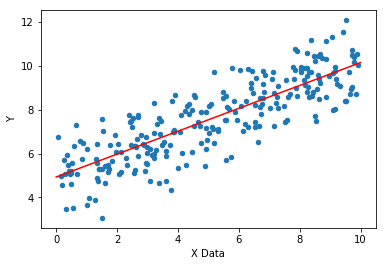

In [31]:
my_data.sample(n=250).plot(kind="scatter", x='X Data', y='Y')
plt.plot(x_data,y_hat,'r')

# TF Estimator

In [34]:
feat_cols = [tf.feature_column.numeric_column('x',shape=[1])]

In [35]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\devan\\AppData\\Local\\Temp\\tmppb42mtir', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000020080EC3908>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x_train, x_eval, y_train, y_eval = train_test_split(x_data,y_true,test_size=0.3, random_state=101)

In [41]:
print(x_train.shape)

(700000,)


In [42]:
input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=8,num_epochs=None,shuffle=True)

In [43]:
train_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=8,num_epochs=1000,shuffle=False)

In [44]:
eval_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_eval},y_eval,batch_size=8,num_epochs=1000,shuffle=False)

In [46]:
estimator.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\devan\AppData\Local\Temp\tmppb42mtir\model.ckpt.
INFO:tensorflow:loss = 382.2958, step = 1
INFO:tensorflow:global_step/sec: 503.682
INFO:tensorflow:loss = 24.961246, step = 101 (0.189 sec)
INFO:tensorflow:global_step/sec: 631.195
INFO:tensorflow:loss = 10.501784, step = 201 (0.158 sec)
INFO:tensorflow:global_step/sec: 604.41
INFO:tensorflow:loss = 8.204649, step = 301 (0.165 sec)
INFO:tensorflow:global_step/sec: 488.856
INFO:tensorflow:loss = 9.939688, step = 401 (0.205 sec)
INFO:tensorflow:global_step/sec: 600.786
INFO:tensorflow:loss = 18.88057, step = 501 (0.166 sec)
INFO:tensorflow:global_step/sec: 623.306
INFO:tensorflow:loss = 8.260048, step = 601 (0.160 sec)
INFO:tensorflow:global_step/sec: 5

In [47]:
train_metrics = estimator.evaluate(input_fn=train_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-05-18-15:50:13
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\devan\AppData\Local\Temp\tmppb42mtir\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-05-18-15:50:15
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0753554, global_step = 1000, loss = 8.602843


In [48]:
eval_matrics = estimator.evaluate(input_fn=eval_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-05-18-15:51:50
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\devan\AppData\Local\Temp\tmppb42mtir\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-05-18-15:51:51
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0860761, global_step = 1000, loss = 8.688609


In [50]:
print('Training Data Metrics')
print(train_metrics)

Training Data Metrics
{'average_loss': 1.0753554, 'loss': 8.602843, 'global_step': 1000}


In [51]:
print('Training Eval Metrics')
print(eval_matrics)

Training Eval Metrics
{'average_loss': 1.0860761, 'loss': 8.688609, 'global_step': 1000}


In [52]:
brand_new_data = np.linspace(0,10,10)

In [53]:
brand_new_data

array([ 0.        ,  1.11111111,  2.22222222,  3.33333333,  4.44444444,
        5.55555556,  6.66666667,  7.77777778,  8.88888889, 10.        ])

In [54]:
input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x':brand_new_data},shuffle=False)

In [55]:
list(estimator.predict(input_fn=input_fn_predict))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\devan\AppData\Local\Temp\tmppb42mtir\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([4.412975], dtype=float32)},
 {'predictions': array([5.0671554], dtype=float32)},
 {'predictions': array([5.7213354], dtype=float32)},
 {'predictions': array([6.375516], dtype=float32)},
 {'predictions': array([7.0296965], dtype=float32)},
 {'predictions': array([7.683876], dtype=float32)},
 {'predictions': array([8.338057], dtype=float32)},
 {'predictions': array([8.992237], dtype=float32)},
 {'predictions': array([9.646418], dtype=float32)},
 {'predictions': array([10.300598], dtype=float32)}]

In [56]:
estimator

In [57]:
predictions = []

In [58]:
for pred in estimator.predict(input_fn=input_fn_predict):
    predictions.append(pred['predictions'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\devan\AppData\Local\Temp\tmppb42mtir\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [59]:
predictions

[array([4.412975], dtype=float32),
 array([5.0671554], dtype=float32),
 array([5.7213354], dtype=float32),
 array([6.375516], dtype=float32),
 array([7.0296965], dtype=float32),
 array([7.683876], dtype=float32),
 array([8.338057], dtype=float32),
 array([8.992237], dtype=float32),
 array([9.646418], dtype=float32),
 array([10.300598], dtype=float32)]

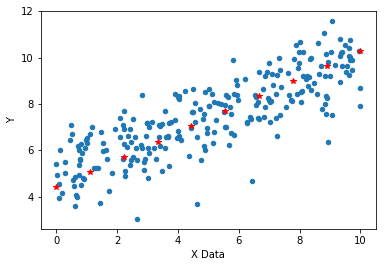

In [63]:
my_data.sample(250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(brand_new_data,predictions,'r*')